# Import Necessary Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
flies = pd.read_csv('forestfires.csv')
flies

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Data Understanding

In [3]:
flies.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
flies.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
print(flies.month.unique())
print(flies.month.nunique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
12


In [6]:
flies.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [7]:
flies.size_category.unique()

array(['small', 'large'], dtype=object)

# Data Preparation

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

flies['month'] = le.fit_transform(flies['month'])
flies['day'] = le.fit_transform(flies['day'])
flies['size_category'] = le.fit_transform(flies['size_category'])

In [9]:
flies.dtypes

month              int32
day                int32
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object

In [10]:
X = flies.drop('size_category',axis=1)
y = flies[['size_category']]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=12,stratify=y,test_size=.15)

# Model Building

In [19]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=svc,param_grid={'C':[1,2,3,4,5,6,7,8,9,10],
                                               'kernel':['rbf','linear','poly'],
                                              'gamma':[0.1,0.2,0.3,0.4,0.5]},cv=5)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf', 'linear', 'poly']})

In [20]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [22]:
from sklearn.svm import SVC
svc = SVC(C=1,gamma=0.1,kernel='linear')

svc.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

# Model Testing

#### Train data

In [28]:
y_pred_train = svc.predict(X_train)
y_pred_train

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [27]:
y_pred_test = svc.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score,classification_report,r2_score,roc_auc_score,confusion_matrix

accuracy score: 1.0
classification reort:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       321

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439

r2_score: 1.0
roc_auc_curve: 1.0


<AxesSubplot:>

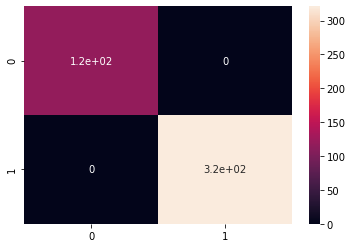

In [30]:
print('accuracy score:',accuracy_score(y_train,y_pred))
print('classification reort:',classification_report(y_train,y_pred))
print('r2_score:',r2_score(y_train,y_pred))
print('roc_auc_curve:',roc_auc_score(y_train,y_pred))
con = confusion_matrix(y_train,y_pred_train)
sns.heatmap(data= con,annot=True)

#### Test Data

accuracy score: 0.9743589743589743
classification reort:               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.96      0.98        57

    accuracy                           0.97        78
   macro avg       0.96      0.98      0.97        78
weighted avg       0.98      0.97      0.97        78

r2_score: 0.8696741854636592
roc_auc_curve: 0.9824561403508771


<AxesSubplot:>

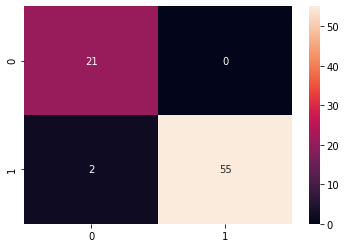

In [31]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification reort:',classification_report(y_test,y_pred_test))
print('r2_score:',r2_score(y_test,y_pred_test))
print('roc_auc_curve:',roc_auc_score(y_test,y_pred_test))
con2 = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data= con2,annot=True)

# Using ploy kernel

In [53]:
score =[]
for i in range(1,20):
    svc = SVC(gamma=0.1,C =i,kernel= 'poly')
    svc.fit(X_train,y_train)
    y_pred_test = svc.predict(X_test)
    score.append(accuracy_score(y_test,y_pred_test))

In [54]:
score

[0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872,
 0.9871794871794872]

In [55]:
np.argmax(score),np.max(score)

(0, 0.9871794871794872)

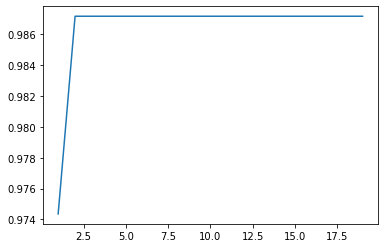

In [38]:
plt.plot(range(1,20),score)

In [87]:
svc_poly = SVC(gamma=0.1,C =1,kernel= 'poly')
svc_poly.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='poly')

#### Test data

In [89]:
y_pred_test = svc_poly.predict(X_test)

accuracy score: 0.9871794871794872
classification reort:               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.98      0.99        57

    accuracy                           0.99        78
   macro avg       0.98      0.99      0.98        78
weighted avg       0.99      0.99      0.99        78

r2_score: 0.9348370927318296
roc_auc_curve: 0.9912280701754386


<AxesSubplot:>

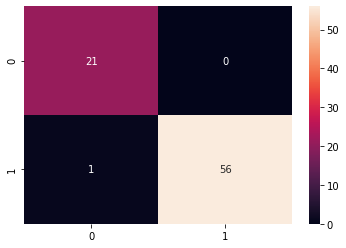

In [90]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('classification reort:',classification_report(y_test,y_pred_test))
print('r2_score:',r2_score(y_test,y_pred_test))
print('roc_auc_curve:',roc_auc_score(y_test,y_pred_test))
con2 = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data= con2,annot=True)

## ploy is giving better accuracy 